Optimal number of features: 24
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



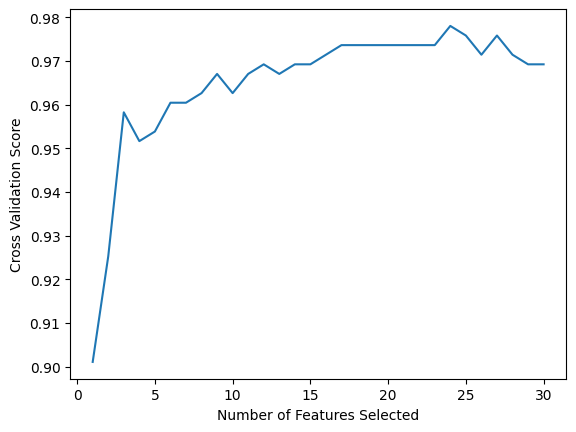

In [1]:
# Feature Selection using RFECV with SVM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM model
svm = SVC(kernel='linear')

# RFECV for automatic feature selection
rfecv = RFECV(
    estimator=svm,
    step=1,
    cv=5,
    scoring='accuracy'
)

rfecv.fit(X_train_scaled, y_train)

print("Optimal number of features:", rfecv.n_features_)

# Transform dataset using selected features
X_train_selected = rfecv.transform(X_train_scaled)
X_test_selected = rfecv.transform(X_test_scaled)

# Train final model
svm.fit(X_train_selected, y_train)

# Predict
y_pred = svm.predict(X_test_selected)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot cross-validation scores
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross Validation Score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
         rfecv.cv_results_['mean_test_score'])
plt.show()